House Price Prediction

In [2]:
import pandas as pd

In [3]:
data=pd.read_excel(r'C:\Users\sajid\Downloads\HousePricePrediction.xlsx')

In [4]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [5]:
data.shape

(2919, 13)

<Axes: >

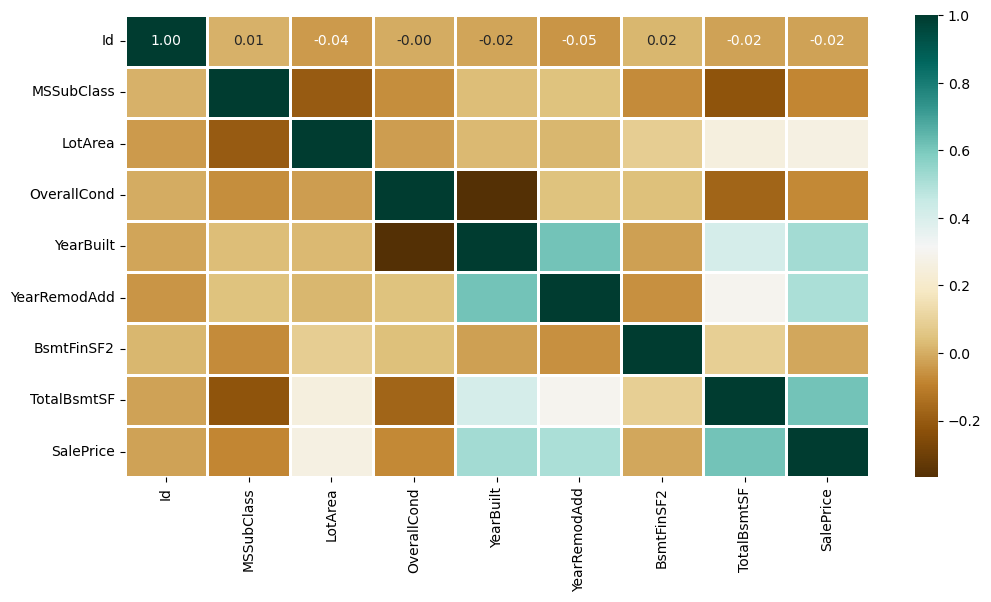

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [7]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [8]:
#Replacing null values
data['SalePrice'].fillna(data['SalePrice'].mean(),inplace=True)

In [9]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [10]:
#id column is not necessary for prediction
data=data.drop(columns=['Id'])
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [11]:
data=data.dropna()

In [12]:
data.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [13]:
data.shape

(2913, 12)

In [14]:
data['TotalBsmtSF'].value_counts()

TotalBsmtSF
0.0       75
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1571.0     1
2633.0     1
757.0      1
873.0      1
1381.0     1
Name: count, Length: 1058, dtype: int64

In [15]:
'''
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['MSZoning']=encoder.fit_transform(data['MSZoning'])
data['LotConfig']=encoder.fit_transform(data['LotConfig'])
data['BldgType']=encoder.fit_transform(data['BldgType'])
data['Exterior1st']=encoder.fit_transform(data['Exterior1st'])
'''
new_dataset=data.dropna()
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
	len(object_cols))
if all(col in data.columns for col in object_cols):
    data = pd.get_dummies(data, columns=object_cols, drop_first=True)
    data.head()
    encoded_columns = data.columns
else:
    print("Error: One or more of the specified columns are not present in the DataFrame.")
    # Add debugging steps here to investigate why the columns are missing.
    # For example, print the existing columns:
    print(data.columns)

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [16]:
data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,False,False,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,False,False,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,False,False,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,False,False,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,False,False,...,True,False,False,False,False,False,False,False,False,False
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,False,False,...,True,False,False,False,False,False,False,False,False,False
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,False,False,...,False,False,False,False,False,False,False,True,False,False
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,False,False,...,False,True,False,False,False,False,False,False,False,False


In [17]:
x=data.drop(columns=['SalePrice'])
x

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,20,9600,8,1976,1976,0.0,1262.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,60,11250,5,2001,2002,0.0,920.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,70,9550,5,1915,1970,0.0,756.0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,60,14260,5,2000,2000,0.0,1145.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2915,160,1894,5,1970,1970,0.0,546.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2916,20,20000,7,1960,1996,0.0,1224.0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2917,85,10441,5,1992,1992,0.0,912.0,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [18]:
y=data['SalePrice']
y

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2913, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.23529412, 0.0334198 , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03879502, 0.875     , ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.04650728, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.08740564, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.38235294, 0.04272593, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.03892122, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
#train-test-split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

In [21]:
#SVM
from sklearn import svm
model_svm=svm.SVR()
model_svm.fit(xtrain,ytrain)


SVR()

In [22]:
predict=model_svm.predict(xtest)
predict

array([180920.4354977 , 180921.05191688, 180920.95571063, 180921.18295816,
       180921.09661654, 180921.3232456 , 180921.32878826, 180921.04657193,
       180920.71506613, 180921.16814821, 180921.07651857, 180921.23529316,
       180920.69471718, 180921.3667868 , 180920.87250367, 180921.33747645,
       180921.43971107, 180921.30433184, 180921.0086769 , 180920.83062876,
       180921.2138202 , 180920.80269169, 180921.09728277, 180921.05542931,
       180920.7820566 , 180921.75076935, 180920.07430103, 180920.40302767,
       180921.30485154, 180920.64121745, 180921.28285775, 180921.39240567,
       180920.18265083, 180921.29513003, 180921.12071553, 180920.67169225,
       180921.32593946, 180920.96369002, 180920.37700264, 180921.12012877,
       180921.13832722, 180921.09143436, 180921.09588177, 180921.24777865,
       180921.42504989, 180921.42595139, 180921.24070476, 180920.62346251,
       180921.38845704, 180919.3207399 , 180921.26878465, 180921.21079792,
       180920.35805649, 1

In [23]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
print("MAPE: ",mean_absolute_percentage_error(ytest,predict))
print("MSE: ",mean_squared_error(ytest,predict))
print("MAE: ",mean_absolute_error(ytest,predict))

MAPE:  0.16237681513321756
MSE:  3425329424.337725
MAE:  28386.354272081648


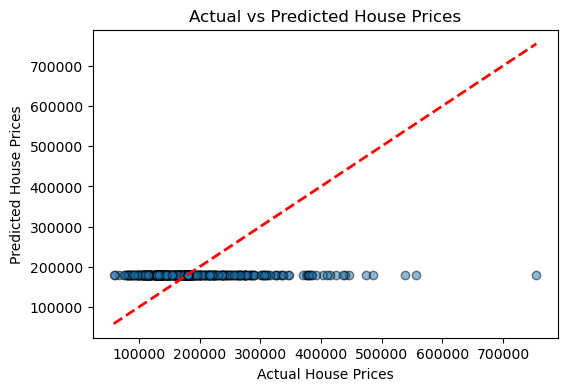

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(ytest, predict, alpha=0.5, edgecolors='k')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

In [25]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model_rfr=RandomForestRegressor(n_estimators=9)
model_rfr.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=9)

In [26]:
predictRFR=model_rfr.predict(xtest)
predictRFR

array([169060.26575342, 115418.17640791, 145269.0217656 , 218242.75372907,
       159160.93013699, 180921.19589041, 196233.99771689, 151298.30928463,
       170853.86484018, 161853.86484018, 167972.88660578, 189442.62085236,
       110831.64261796, 193613.99771689, 137631.64261796, 200580.64261796,
       204336.15235921, 189909.42039574, 159149.81902588, 170373.73196347,
       180694.26347032, 166564.97595129, 180921.19589041, 156123.35281583,
       169909.42039574, 254614.13059361, 100017.0435312 , 171614.13059361,
       207946.79954338, 159687.19817352, 181716.48569254, 199267.33105023,
       136498.30928463, 240565.82130898, 183660.93013699, 157357.0652968 ,
       182529.28751903, 133643.59908676, 132079.26575342, 166438.70791476,
       151491.13059361, 182088.93242009, 180921.19589041, 182494.26347032,
       213751.50974125, 244314.26575342, 185400.66438356, 149893.59908676,
       224535.68843227, 143564.57732116, 256604.88888889, 232909.42039574,
       162733.99771689, 2

In [27]:
print("MAPE: ",mean_absolute_percentage_error(ytest,predictRFR))
print("MSE: ",mean_squared_error(ytest,predictRFR))
print("MAE: ",mean_absolute_error(ytest,predictRFR))

MAPE:  0.1912887952919896
MSE:  2717072472.790151
MAE:  34230.10196678456


In [28]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [29]:
predictLR=lr.predict(xtest)
predict

array([180920.4354977 , 180921.05191688, 180920.95571063, 180921.18295816,
       180921.09661654, 180921.3232456 , 180921.32878826, 180921.04657193,
       180920.71506613, 180921.16814821, 180921.07651857, 180921.23529316,
       180920.69471718, 180921.3667868 , 180920.87250367, 180921.33747645,
       180921.43971107, 180921.30433184, 180921.0086769 , 180920.83062876,
       180921.2138202 , 180920.80269169, 180921.09728277, 180921.05542931,
       180920.7820566 , 180921.75076935, 180920.07430103, 180920.40302767,
       180921.30485154, 180920.64121745, 180921.28285775, 180921.39240567,
       180920.18265083, 180921.29513003, 180921.12071553, 180920.67169225,
       180921.32593946, 180920.96369002, 180920.37700264, 180921.12012877,
       180921.13832722, 180921.09143436, 180921.09588177, 180921.24777865,
       180921.42504989, 180921.42595139, 180921.24070476, 180920.62346251,
       180921.38845704, 180919.3207399 , 180921.26878465, 180921.21079792,
       180920.35805649, 1

In [30]:
print("MAPE: ",mean_absolute_percentage_error(ytest,predictLR))

MAPE:  0.1819932477347245


In [31]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
xg_reg.fit(xtrain, ytrain)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [32]:
predictxg=xg_reg.predict(xtest)
predict

array([180920.4354977 , 180921.05191688, 180920.95571063, 180921.18295816,
       180921.09661654, 180921.3232456 , 180921.32878826, 180921.04657193,
       180920.71506613, 180921.16814821, 180921.07651857, 180921.23529316,
       180920.69471718, 180921.3667868 , 180920.87250367, 180921.33747645,
       180921.43971107, 180921.30433184, 180921.0086769 , 180920.83062876,
       180921.2138202 , 180920.80269169, 180921.09728277, 180921.05542931,
       180920.7820566 , 180921.75076935, 180920.07430103, 180920.40302767,
       180921.30485154, 180920.64121745, 180921.28285775, 180921.39240567,
       180920.18265083, 180921.29513003, 180921.12071553, 180920.67169225,
       180921.32593946, 180920.96369002, 180920.37700264, 180921.12012877,
       180921.13832722, 180921.09143436, 180921.09588177, 180921.24777865,
       180921.42504989, 180921.42595139, 180921.24070476, 180920.62346251,
       180921.38845704, 180919.3207399 , 180921.26878465, 180921.21079792,
       180920.35805649, 1

In [33]:
print("MAPE: ",mean_absolute_percentage_error(ytest,predictxg))
print("MSE: ",mean_squared_error(ytest,predictxg))
print("MAE: ",mean_absolute_error(ytest,predictxg))

MAPE:  0.17579916240849602
MSE:  2078220549.579491
MAE:  31255.57254056005
